![resnet architecture](resnet_arch.png)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!unzip '/content/drive/My Drive/archive.zip'

Streaming output truncated to the last 5000 lines.
  inflating: myData/8/00015_00011.jpg  
  inflating: myData/8/00015_00012.jpg  
  inflating: myData/8/00015_00013.jpg  
  inflating: myData/8/00015_00014.jpg  
  inflating: myData/8/00015_00015.jpg  
  inflating: myData/8/00015_00016.jpg  
  inflating: myData/8/00015_00017.jpg  
  inflating: myData/8/00015_00018.jpg  
  inflating: myData/8/00015_00019.jpg  
  inflating: myData/8/00015_00020.jpg  
  inflating: myData/8/00015_00021.jpg  
  inflating: myData/8/00015_00022.jpg  
  inflating: myData/8/00015_00023.jpg  
  inflating: myData/8/00015_00024.jpg  
  inflating: myData/8/00015_00025.jpg  
  inflating: myData/8/00015_00026.jpg  
  inflating: myData/8/00015_00027.jpg  
  inflating: myData/8/00015_00028.jpg  
  inflating: myData/8/00015_00029.jpg  
  inflating: myData/8/00016_00000.jpg  
  inflating: myData/8/00016_00001.jpg  
  inflating: myData/8/00016_00002.jpg  
  inflating: myData/8/00016_00003.jpg  
  inflating: myData/8/00016_0

In [15]:
!ls

drive  extract.py  labels.csv  model_trained.p	myData	sample_data



# Traffic Sign Classification

Traffic Sign Classification Using **Convolutional Neural Networks(CNNs)**, Which is widely used in various applications in the field of Artificial Intelligence. This notebook focuses on developing a deep learning model in order to classify the traffic signs.🛑❌🚫🚷🚳

![taffic_signs](https://www.nevron.com/NIMG.axd?i=Diagram/Shapes/TrafficSignsShapes/Traffic_signs_shapes.png)


# Importing Libraries

In [16]:
import pandas as pd
import os
import numpy as np
import seaborn as sns

In [17]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
from tensorflow.keras.utils import plot_model

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

# Deep Learning
import tensorflow as tf
print('TensoFlow Version: ', tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout
from tensorflow.keras.applications.resnet import ResNet50

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

TensoFlow Version:  2.3.0


# Giving the data path

In [18]:
path = ''
lab = pd.read_csv('labels.csv')

# Visualizing countplot of the classes

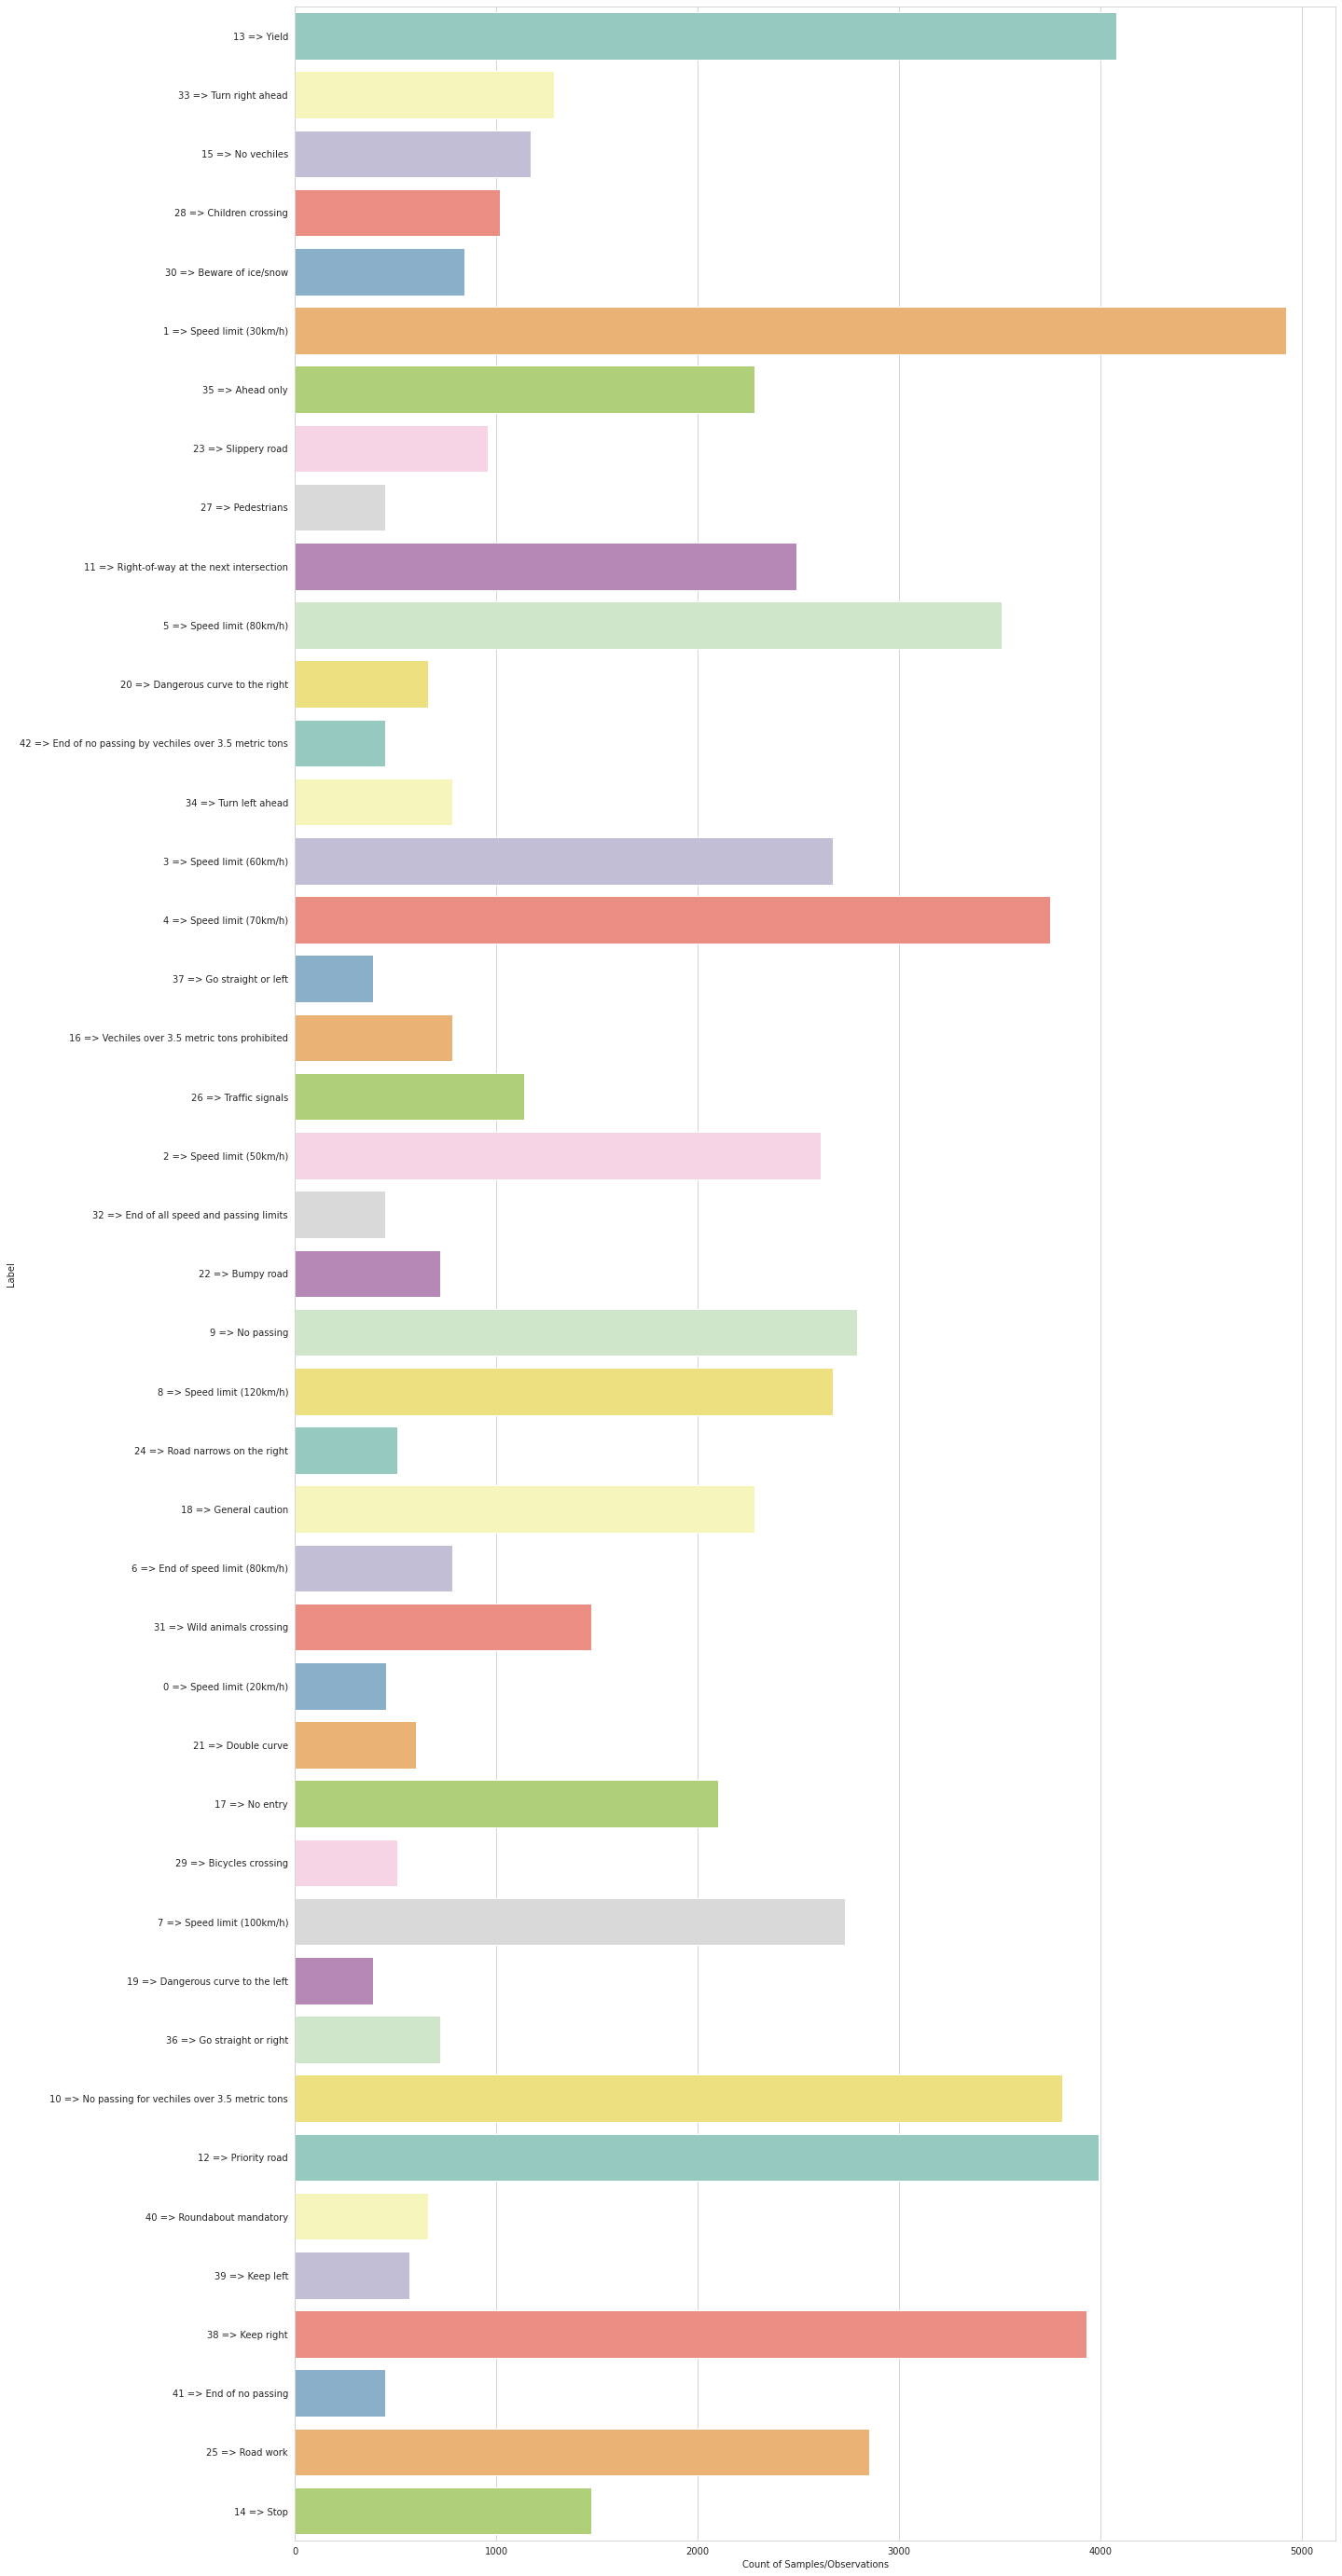

In [19]:
# Count PLot of the samples/observations w.r.t the classes
d = dict()
class_labels = dict()
for dirs in os.listdir(path + 'myData'):
    count = len(os.listdir(path+'myData/'+dirs))
    d[dirs+' => '+lab[lab.ClassId == int(dirs)].values[0][1]] = count
    class_labels[int(dirs)] = lab[lab.ClassId == int(dirs)].values[0][1]

plt.figure(figsize = (20, 50))
sns.barplot(y = list(d.keys()), x = list(d.values()), palette = 'Set3')
plt.ylabel('Label')
plt.xlabel('Count of Samples/Observations');

# Reading Image Data

In [20]:
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 3
nb_classes = 43
print(nb_classes)

datagen = ImageDataGenerator()
data = datagen.flow_from_directory(r'myData',
                                    target_size=(32, 32),
                                    batch_size=73139,
                                    class_mode='categorical',
                                    shuffle=True )


43
Found 73139 images belonging to 43 classes.


In [21]:
X , y = data.next()

In [22]:
# Labels are one hot encoded
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(73139, 32, 32, 3)
Labels shape :(73139, 43)


# Sample Images of Dataset

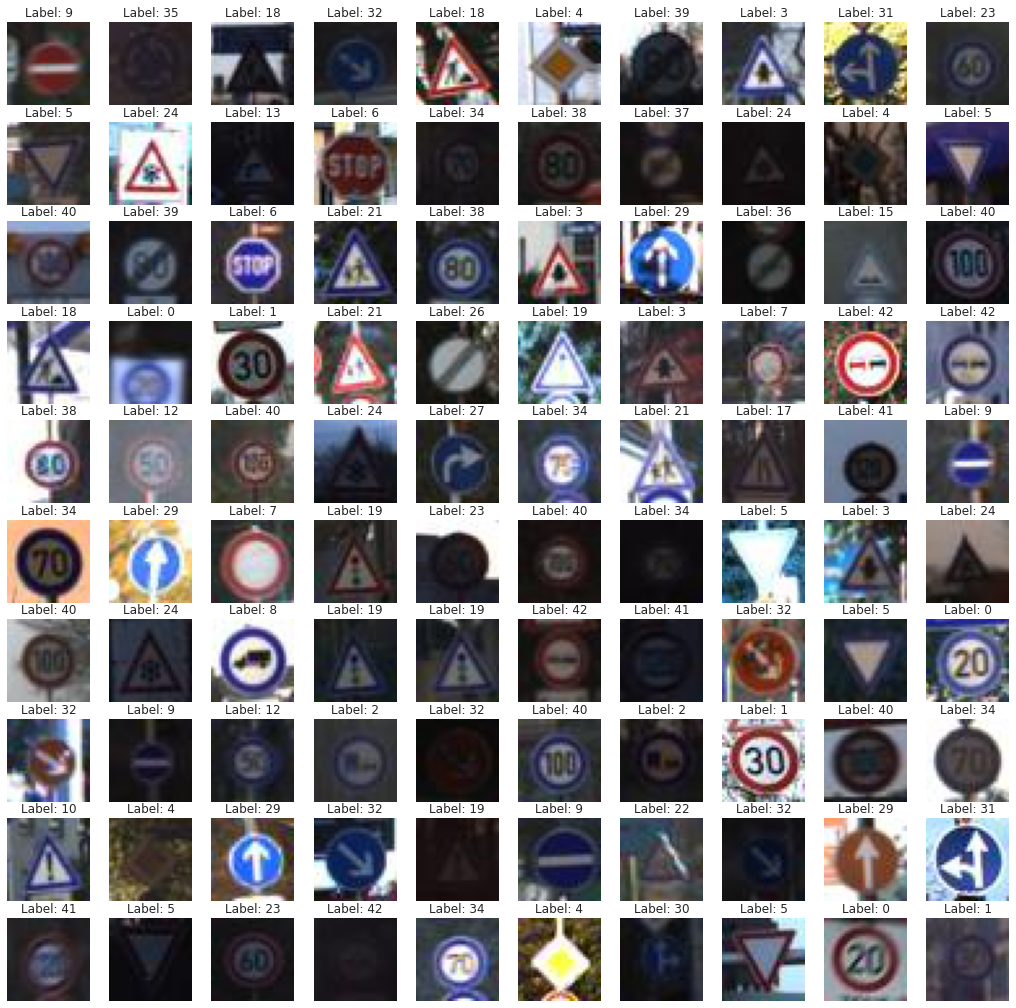

In [23]:
fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))
    


#Dividing data into train and test in the split percentage of 80:20

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

In [25]:
print("Train Shape: {}\nTest Shape : {}".format(X_train.shape, X_test.shape))

Train Shape: (58511, 32, 32, 3)
Test Shape : (14628, 32, 32, 3)


# Customising ResNet50 model

In [26]:
resnet = ResNet50(weights= None, include_top=False, input_shape= (img_rows,img_cols,img_channels))

In [27]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

In [28]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

## Visualising Model Architecture

In [29]:
plot_model(model, show_layer_names=True, show_shapes =True, to_file='model.png', dpi=350)

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.478672 to fit



## Compiling the Model

In [30]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Creating Callbacks

In [31]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')


## Fitting Model with Data

In [32]:
n_epochs = 10
history =  model.fit(X_train, y_train,  batch_size = 32, epochs = n_epochs, verbose = 1, 
              validation_data = (X_test, y_test), callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/10
1829/1829 [==============================] - 181s 99ms/step - loss: 3.5406 - accuracy: 0.2995 - val_loss: 2.9622 - val_accuracy: 0.4160
Epoch 2/10
1829/1829 [==============================] - 179s 98ms/step - loss: 2.5231 - accuracy: 0.4664 - val_loss: 1.8253 - val_accuracy: 0.4655
Epoch 3/10
1829/1829 [==============================] - 179s 98ms/step - loss: 1.5420 - accuracy: 0.6043 - val_loss: 0.5185 - val_accuracy: 0.8324
Epoch 4/10
1829/1829 [==============================] - 179s 98ms/step - loss: 0.7250 - accuracy: 0.8033 - val_loss: 0.5616 - val_accuracy: 0.8538
Epoch 5/10
1829/1829 [==============================] - 177s 97ms/step - loss: 0.4520 - accuracy: 0.8798 - val_loss: 7.8170 - val_accuracy: 0.4376
Epoch 6/10
1829/1829 [==============================] - 179s 98ms/step - loss: 0.5577 - accuracy: 0.8581 - val_loss: 0.3210 - val_accuracy: 0.9087
Epoch 7/10
1829/1829 [==============================] - 180s 99ms/step - loss: 0.3518 - accuracy: 0.9066 - val_loss: 0

In [33]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: ', acc, '\nLoss    : ', loss)

458/458 [==============================] - 11s 24ms/step - loss: 0.0556 - accuracy: 0.9841
Accuracy:  0.984071671962738 
Loss    :  0.05561808869242668


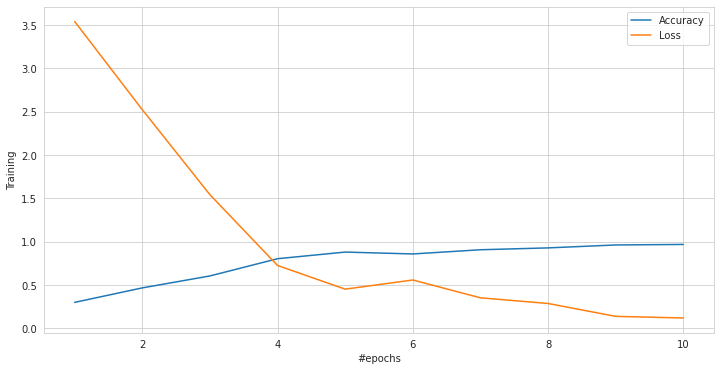

In [34]:
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('#epochs')
plt.ylabel('Training')
plt.legend();

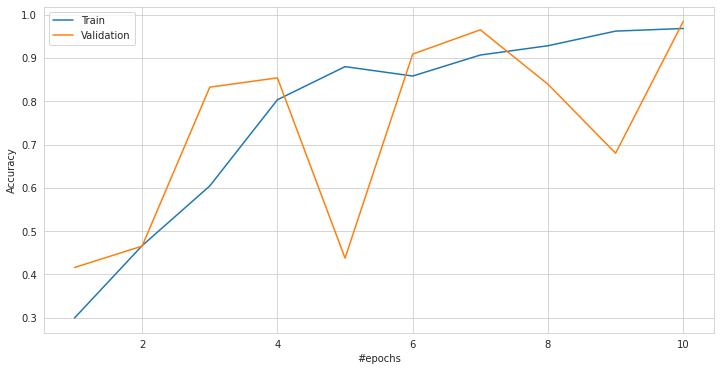

In [35]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_accuracy'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Accuracy')
plt.legend();

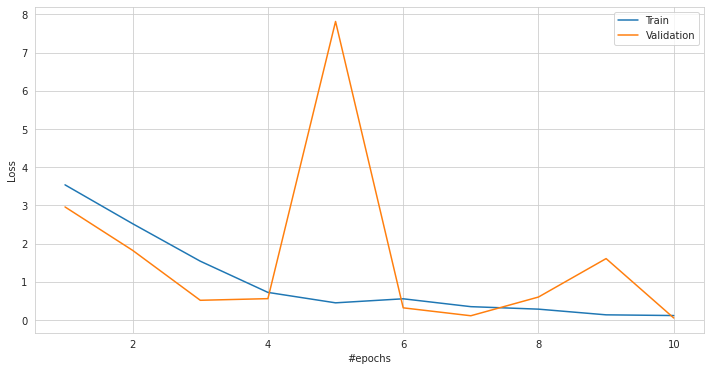

In [36]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_loss'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend();

## Predict class labels of the test data

In [37]:
%%time
pred = np.argmax(model.predict(X_test), axis = 1)

CPU times: user 4.26 s, sys: 371 ms, total: 4.63 s
Wall time: 9.96 s


## Classification Report

In [38]:
labels = [class_labels[i] for i in range(43)]
print(classification_report(np.argmax(y_test, axis = 1), pred, target_names = labels))

                                                    precision    recall  f1-score   support

                              Speed limit (20km/h)       0.88      0.95      0.91        93
                              Speed limit (30km/h)       0.99      0.96      0.98      1022
                              Speed limit (50km/h)       0.99      1.00      0.99       753
                              Speed limit (60km/h)       0.99      0.99      0.99       496
                              Speed limit (70km/h)       0.99      1.00      1.00       804
                              Speed limit (80km/h)       1.00      1.00      1.00       846
                       End of speed limit (80km/h)       1.00      1.00      1.00       277
                             Speed limit (100km/h)       1.00      0.98      0.99       250
                             Speed limit (120km/h)       0.98      1.00      0.99       161
                                        No passing       0.99      1.00      1.

## Confusion Matrix

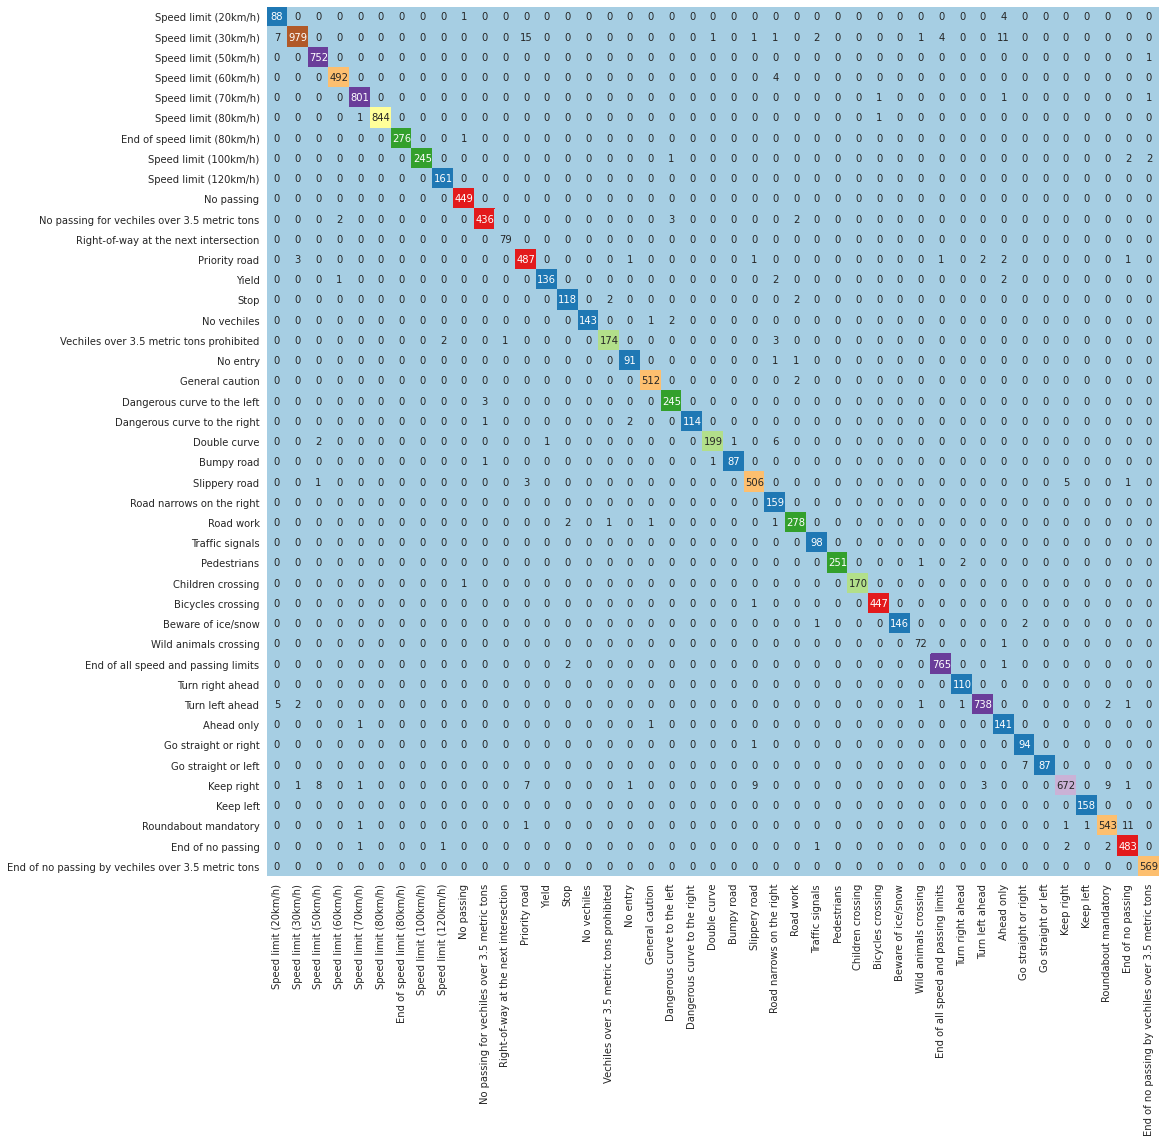

In [39]:
cmat = confusion_matrix(np.argmax(y_test, axis=1), pred)
plt.figure(figsize=(16,16))
sns.heatmap(cmat, annot = True, cbar = False, cmap='Paired', fmt="d", xticklabels=labels, yticklabels=labels);

## Classwise Accuracy

In [40]:
classwise_acc = cmat.diagonal()/cmat.sum(axis=1) * 100 
cls_acc = pd.DataFrame({'Class_Label':[class_labels[i] for i in range(43)], 'Accuracy': classwise_acc.tolist()}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

## Finally, Lets see the predictions of unseen data

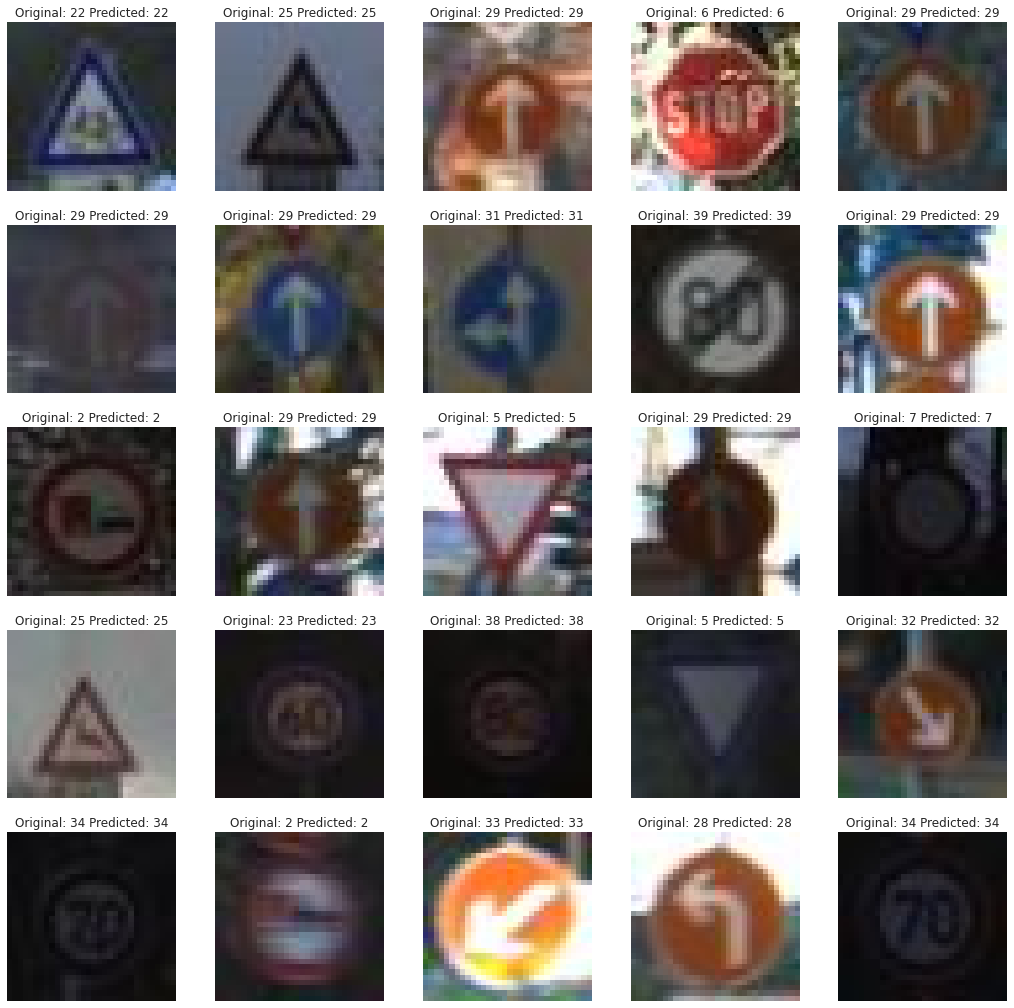

In [41]:
fig, axes = plt.subplots(5,5, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X_test.shape[0])
    ax.imshow(X_test[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Original: {} Predicted: {}'.format(np.argmax(y_test[r]), np.argmax(model.predict(X_test[r].reshape(1, 32, 32, 3)))))